### Task 1: Watermarking
- Display original image and watermark image
- Display the watermarked image

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

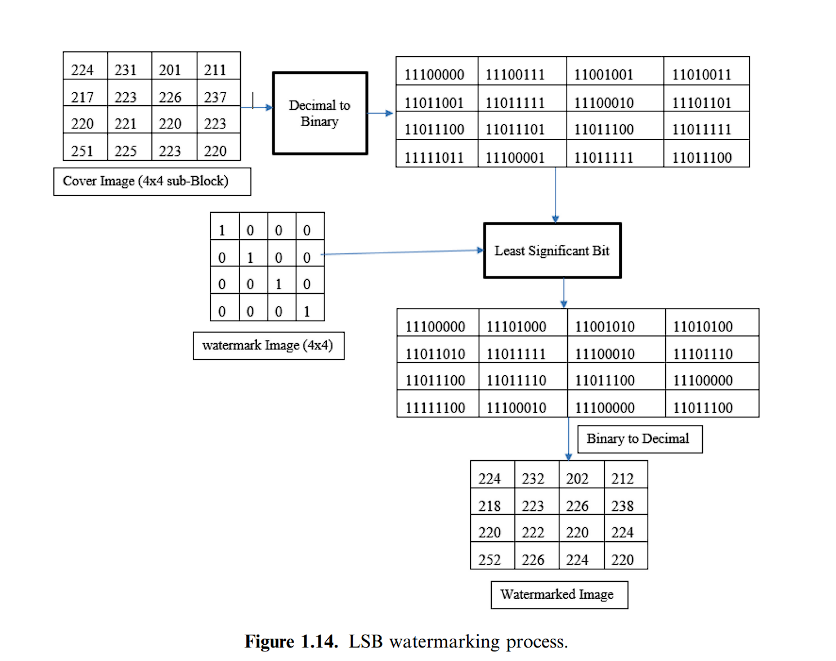

In [13]:
# Converting image into binary
def binarize (image, threshold=128):
    """
    This function will take an image and a threshold value as input. 
    The threshold will determine which pixel intensity will be black or white.
    e.g If threshold=128, then any pixel < 128 will be black (0), else white (255).
    """
    image = Image.fromarray(image)
    image = image.convert("RGB")
    output_image = image.convert("L")
    for x in range(output_image.width):
        for y in range(output_image.height):
            if output_image.getpixel((x, y)) < threshold:
                output_image.putpixel((x, y), 0)
            else:
                output_image.putpixel((x, y), 255)
    return output_image

In [5]:
original_image = cv2.imread("./image/212657710_200x200.jpg", cv2.IMREAD_COLOR)
watermark_image = cv2.imread("./image/watermark.jpg", cv2.IMREAD_COLOR)

Text(0.5, 1.0, 'Watermark')

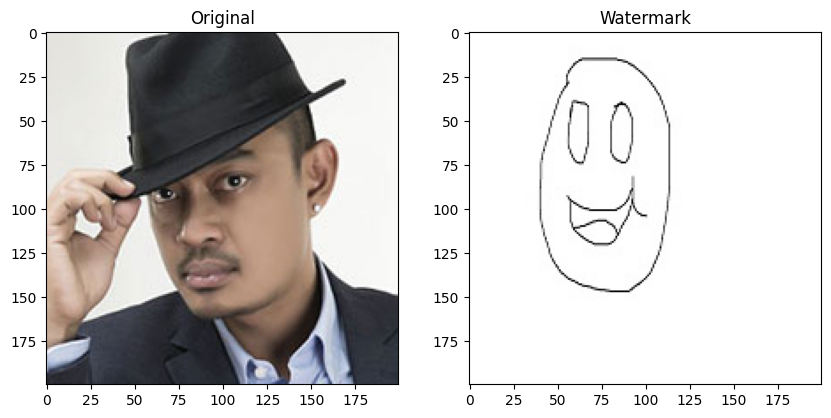

In [34]:
original = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(watermark_image, cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap=plt.cm.gray)
plt.axis("on")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(watermark)
plt.axis("on")
plt.title("Watermark")


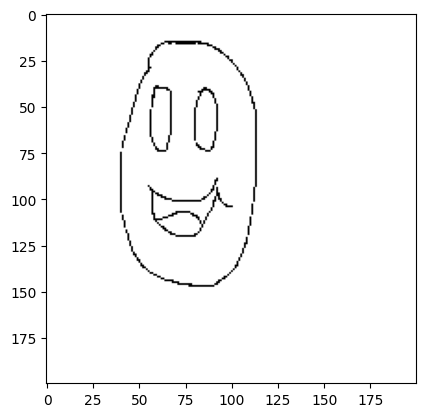

In [17]:
# Trasnform watermark into binary format
watermark_binary = binarize(watermark, threshold=160)
plt.imshow(watermark_binary, cmap="gray")

In [66]:
# Flatten the numpy rray images
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
watermark_gray = cv2.cvtColor(watermark, cv2.COLOR_BGR2GRAY)

original_array = np.array(list(original_gray.flatten()))
watermark_array = np.array(list(watermark_binary.getdata()))

Text(0.5, 1.0, 'Watermarked Image')

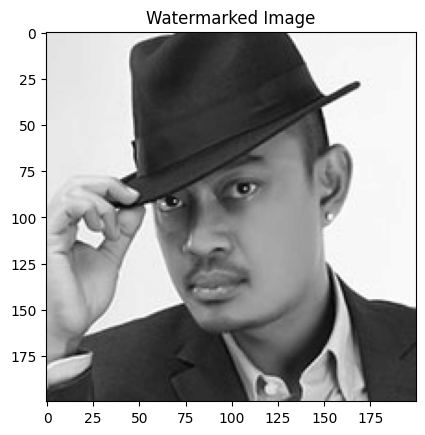

In [67]:
for p in range(original_array.shape[0]):
    bin1 = bin(original_array[p]) [2:-1]
    x = bin(watermark_array[p]) [2]
    bin1 += x
    original_array [p]=int(bin1, 2)

# Converting the watermarked array into image
original_array = original_array.reshape(200, 200)
encoded_image = Image.fromarray(original_array.astype("uint8"), Image.fromarray(original_gray).mode)
plt.imshow(encoded_image, cmap="gray")
plt.title("Watermarked Image")

Text(0.5, 1.0, 'Extracted Watermark')

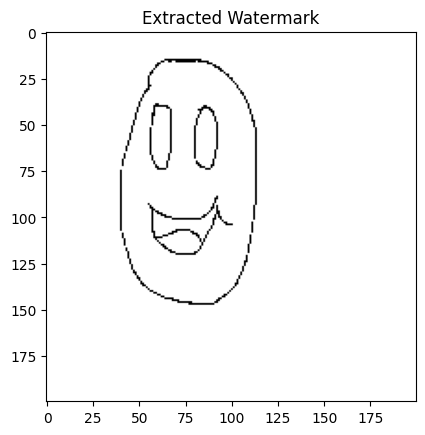

In [70]:
# Extracting watermark from watermarked image
extract_array = np.array(list(encoded_image.getdata()))

for p in range(watermark_array.shape[0]):
    if bin(extract_array [p]) [-1] == "1":extract_array [p] = 255
    else: extract_array [p] = 0

extract_array = extract_array.reshape(200, 200)
extracted_watermark = Image.fromarray(extract_array.astype("uint8"), Image.fromarray(watermark_gray).mode)
plt.imshow(extracted_watermark, cmap="gray")
plt.title("Extracted Watermark")

### Task 2: Scikit-image package
- Load an image from that package
- Display it using imshow from skimag.io
- Convert current color space to HSV and display original and converted

In [72]:
from skimage import io, color
import skimage as ski

C:\Users\Angkor Computer\AppData\Local\Temp\ipykernel_10336\852445900.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(astronaut)


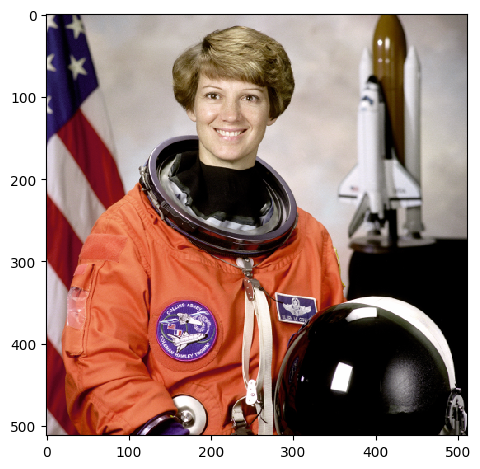

In [82]:
# Load an image from the scikit-image package
astronaut = ski.data.astronaut()
io.imshow(astronaut)
plt.show()


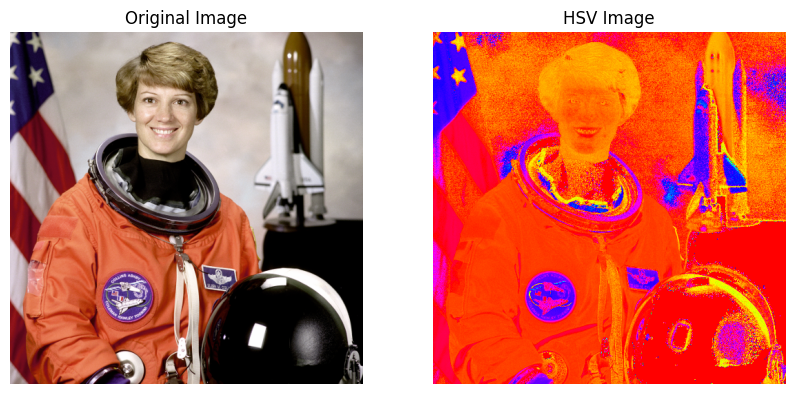

In [84]:
hsv_astronaut = color.rgb2hsv(astronaut)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(astronaut)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(hsv_astronaut[:, :, 0], cmap="hsv") 
axes[1].set_title("HSV Image")
axes[1].axis("off")

plt.show()

### Task 3: Load 4 different image from scikit-image and OpenCv-Library
- Display all 4 images in 1 figure
- Crop
- Translating
- Rotation (80 deg)
- Edge detection

In [108]:
astronaut = ski.data.astronaut()
space = ski.data.hubble_deep_field()
coffee = ski.data.coffee()
cat = ski.data.chelsea()

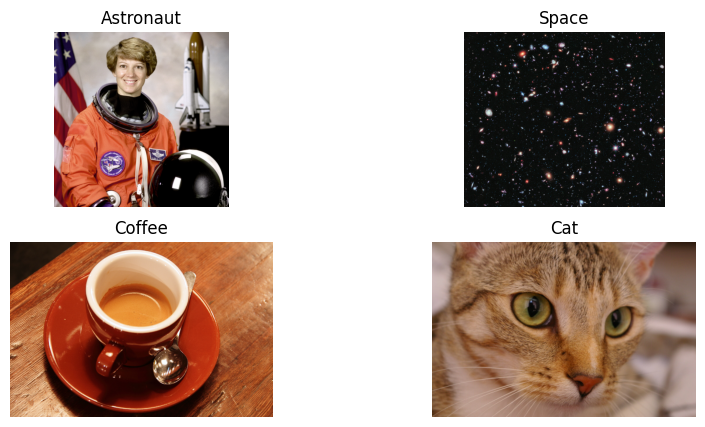

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0, 0].imshow(astronaut)
axes[0, 0].set_title("Astronaut")
axes[0, 0].axis("off")

axes[0, 1].imshow(space) 
axes[0, 1].set_title("Space")
axes[0, 1].axis("off")

axes[1, 0].imshow(coffee) 
axes[1, 0].set_title("Coffee")
axes[1, 0].axis("off")

axes[1, 1].imshow(cat) 
axes[1, 1].set_title("Cat")
axes[1, 1].axis("off")

plt.show()

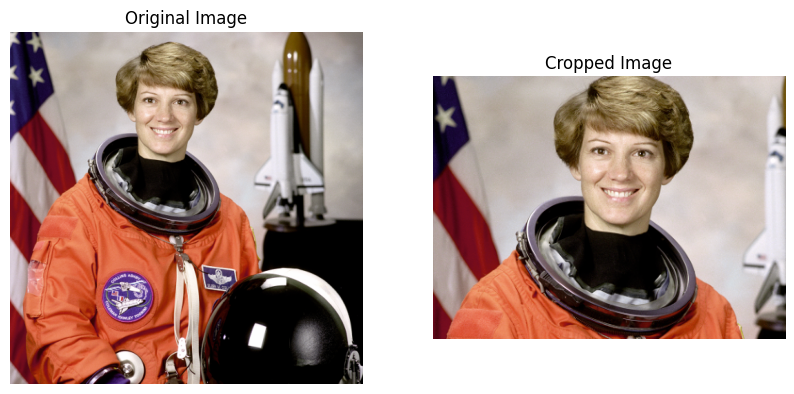

In [105]:
crop_astronaut = astronaut[20: 300, 25: 400]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(astronaut)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(crop_astronaut) 
axes[1].set_title("Cropped Image")
axes[1].axis("off")

plt.show()

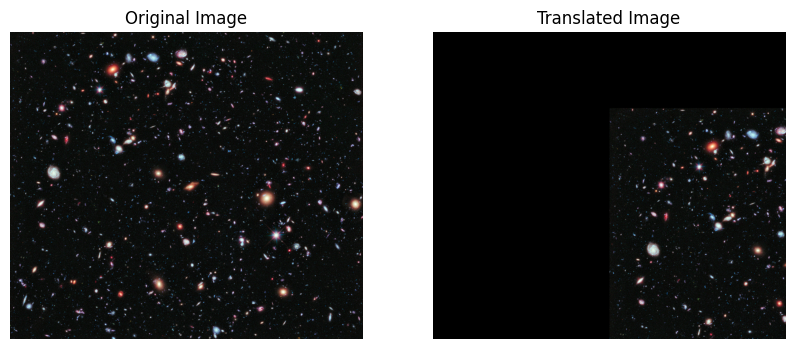

In [110]:
height, width = space.shape[:2]
quarter_height, quarter_width = height / 4, width / 2

translate_matrix = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 

translated_image = cv2.warpAffine(space, translate_matrix, (width, height)) 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(space)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(translated_image) 
axes[1].set_title("Translated Image")
axes[1].axis("off")

plt.show()

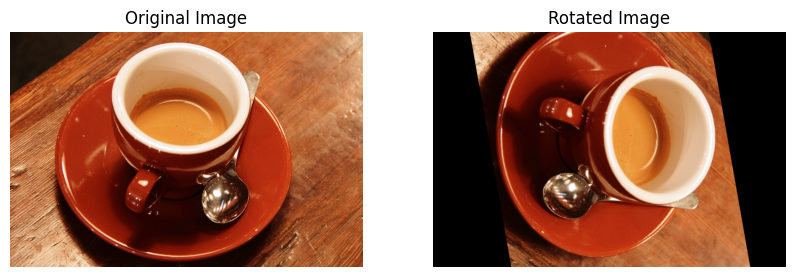

In [119]:
# Compute the affine matrix
height, width = coffee.shape[:2]
center = (width // 2, height // 2)

affine_matrix = cv2.getRotationMatrix2D(center, -80, 1)

rotated_image = cv2.warpAffine(coffee, affine_matrix, (width, height))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(coffee)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(rotated_image) 
axes[1].set_title("Rotated Image")
axes[1].axis("off")

plt.show()

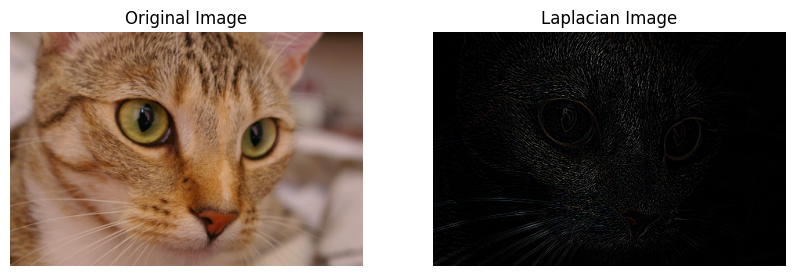

In [120]:
kernel = np.array( [[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

laplacian_image = cv2.filter2D(cat, -1, kernel)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cat)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(laplacian_image) 
axes[1].set_title("Laplacian Image")
axes[1].axis("off")

plt.show()